In [21]:
from chunk_classifier import *
from board_builder import *
from chunker import *
import albumentations as A
from img_render import *

In [7]:
transform = A.Compose([
    A.ColorJitter(p=0.5, hue=(0, 0.05)),
    A.RandomGamma(p=0.5),
    A.Blur(p=0.5),
    A.RandomRotate90(p=0.5),
])

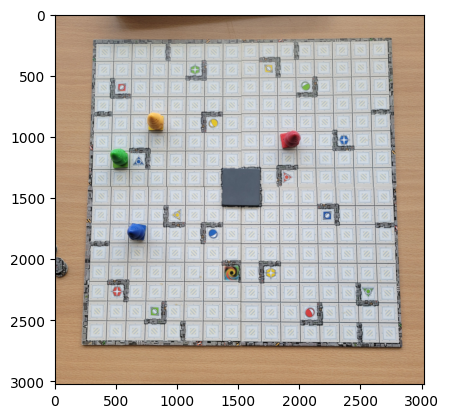

In [27]:
imgs_path = list((DATA_PATH / "input").glob("*"))
img_path = str(np.random.choice(imgs_path, 1)[0])
img = cv2.imread(img_path)
img = transform(image=img)["image"]
plt.imshow(img[:, :, ::-1])

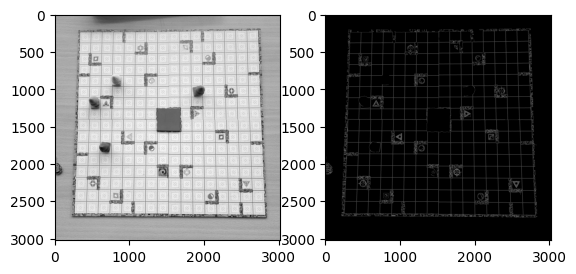

In [28]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey_img = cv2.blur(grey_img, (3, 3))
plt.subplot(121)
plt.imshow(grey_img, cmap="gray")
sigma = 0.75
v = np.median(grey_img)
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(grey_img, lower, upper)
plt.subplot(122)
plt.imshow(edges, cmap="gray")

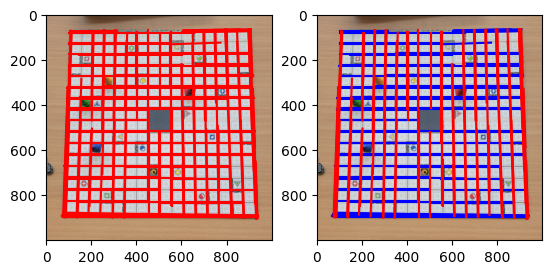

In [29]:
img, img_shape, scale = image_resize(img, height=1000)
lines = get_lines(img)
plt.subplot(121)
plt.imshow(img[:, :, ::-1])
for x1, y1, x2, y2 in lines:
    plt.plot([x1, x2], [y1, y2], "-", color="red")
h_lines, v_lines = classify_lines(lines)
plt.subplot(122)
plt.imshow(img[:, :, ::-1])
for x1, y1, x2, y2 in h_lines:
    plt.plot([x1, x2], [y1, y2], "-", color="blue")
for x1, y1, x2, y2 in v_lines:
    plt.plot([x1, x2], [y1, y2], "-", color="red")



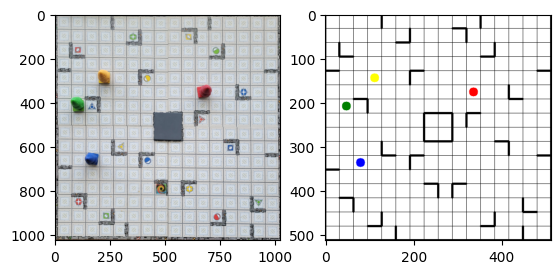

In [30]:
chunks, projected = get_chunks(img, return_projected=True)
plt.subplot(121)
plt.imshow(projected[:, :, ::-1])
proba = predict_chunks(chunks).reshape((16, 16, 4))
board = get_board_bg(proba)
robots = get_robots(chunks.reshape((16, 16, 64, 64, 3)), proba[:, :, 3])
render = render_board(robots, board["walls"])
plt.subplot(122)
plt.imshow(render)

